# Workshop No 1: Python Data Engineer
By: María de los Ángeles Amú Moreno - 2221225


During these workshop, we will address the specified requirements and present diagrams and visualizations to elucidate the solutions. Our approach involves employing SQLAlchemy as an Object-Relational Mapping (ORM) tool connected to PostgreSQL, and we will generate visual representations using PowerBI.

## The step #1 is to import the modules, make the connection to the database, and load the data into it.



First, we install the ORM we are going to work with, which in this case is SQLALchemy.

In [ ]:
#pip install sqlalchemy

We install psycopg2 to allow programs written in Python to connect to, manipulate and manage PostgreSQL databases. PostgreSQL is an open source relational database management system and psycopg2 provides a Python interface to interact with it.

In [ ]:
#pip install psycopg2

Here, we are importing the modules:

In [73]:
from sqlalchemy import Column, Integer, String, Boolean, Date, CHAR
from sqlalchemy.orm import declarative_base
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import json
import pandas as pd

Next, we created the database credentials called "credentials.json", and contains the user, password, port, server & database name, to make the connection with the database

In [74]:
with open('credentials.json', 'r') as json_file:
    data = json.load(json_file)
    user = data["user"]
    password = data["password"]
    port= data["port"]
    server = data["server"]
    db = data["db"]

db_connection = f"postgresql+psycopg2://{user}:{password}@{server}:{port}/{db}"
engine=create_engine(db_connection)
print(f"connected!")

connected!


This message confirms us that the connection to the database was made correctly. To later create the table with the required columns.

In [75]:
Session = sessionmaker(bind=engine)
session = Session()

In [76]:
Base= declarative_base()

class candidates(Base):
    __tablename__ = 'candidates'
    id = Column(Integer, primary_key=True, autoincrement=True)
    first_name = Column(String(50))
    last_name = Column(String(50))
    email = Column(String(100))
    application_date = Column(Date)
    country = Column(String(200))
    yoe = Column(Integer)
    seniority = Column(String(200))
    technology = Column(String(200))
    code_challenge_score = Column(Integer)
    technical_interview_score = Column(Integer)

engine = create_engine(db_connection)
Base.metadata.create_all(engine)

Next, we can see that the table was created successfully:

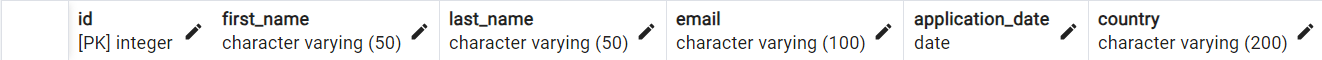
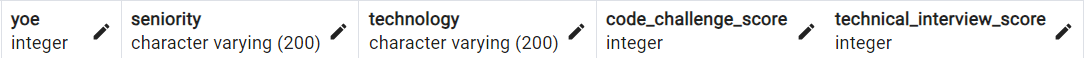

We upload the data in postgreSql, and we will modify the column names in the dataframe to align with the corresponding column names in the table.

In [77]:
class File:
    def __init__(self, file):
        self.df = pd.read_csv(file, sep=';', encoding='utf-8')
    
    def rename_columns(self):
        new_columns = {
            "First Name": "first_name",
            "Last Name": "last_name",
            "Email": "email",
            "Application Date": "application_date",
            "Country": "country",
            "YOE": "yoe",
            "Seniority": "seniority",
            "Technology": "technology",
            "Code Challenge Score": "code_challenge_score",
            "Technical Interview Score": "technical_interview_score"
        }
        self.df.rename(columns=new_columns, inplace=True)


data = File('candidates.csv')
data.rename_columns()


data.df.to_sql('candidates', engine, if_exists='replace', index=False)
print("Data uploaded")

Data uploaded


By leveraging pandas to insert the information from the CSV file, we can seamlessly upload the data to the database.

These are some of the data in our PostgreSQL table

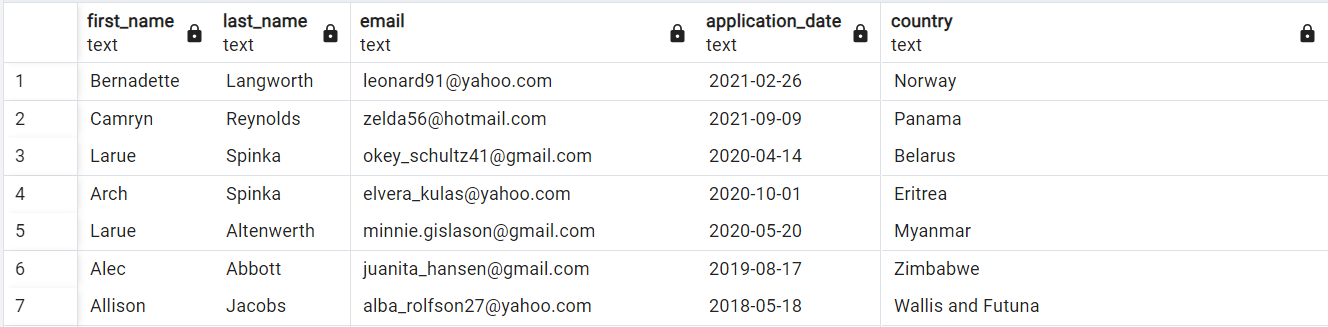
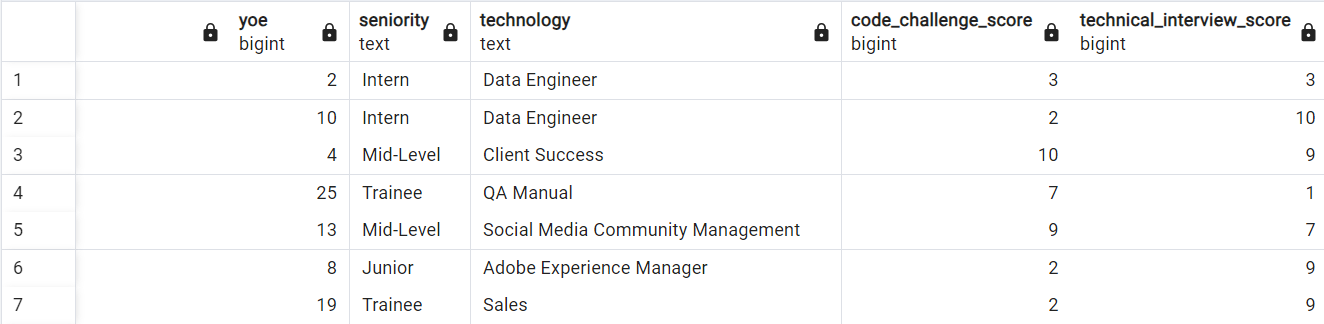

## The step #2 EDA (Exploratory Data Analysis)


Here, let's fetch the "candidates" table from postgreSQL to do the EDA.

In [7]:
import psycopg2

engine = create_engine(db_connection) #We create a SQLAlchemy engine to connect to the database

table_name = 'candidates'  
df = pd.read_sql_table(table_name, engine) #We read the table into a pandas dataframe
data=df

In [8]:
data.head()

,first_name,last_name,email,application_date,country,yoe,seniority,technology,code_challenge_score,technical_interview_score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7


In [9]:
data.shape

(50000, 10)

This dataset contains 50,000 rows with 10 columns.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   first_name                 50000 non-null  object
 1   last_name                  50000 non-null  object
 2   email                      50000 non-null  object
 3   application_date           50000 non-null  object
 4   country                    50000 non-null  object
 5   yoe                        50000 non-null  int64 
 6   seniority                  50000 non-null  object
 7   technology                 50000 non-null  object
 8   code_challenge_score       50000 non-null  int64 
 9   technical_interview_score  50000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.8+ MB


This indicate us that in the data there are no null values, and we are working with objects and integers.

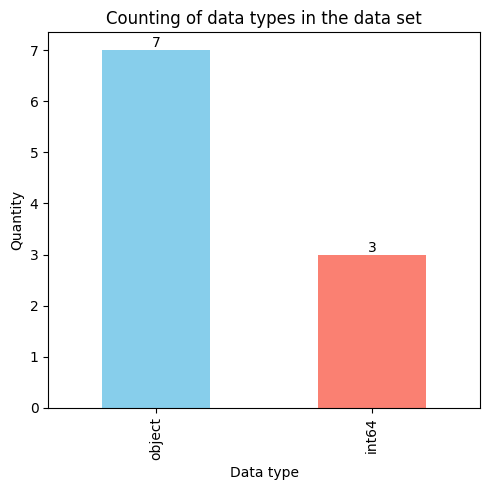

In [12]:
import matplotlib.pyplot as plt

data_types_counts = data.dtypes.value_counts()


colors = ['skyblue', 'salmon']

plt.figure(figsize=(5, 5))
bar_plot = data_types_counts.plot(kind='bar', color=colors)

plt.xlabel('Data type')
plt.ylabel('Quantity')
plt.title('Counting of data types in the data set')


for i, value in enumerate(data_types_counts):
    plt.text(i, value + 0, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

The "candidates" DataFrame comprises 7 columns categorized as "object" (representing categorical data) and 3 columns categorized as "int64" (representing numeric data).

Now, we make a graph to see our unique values per column:

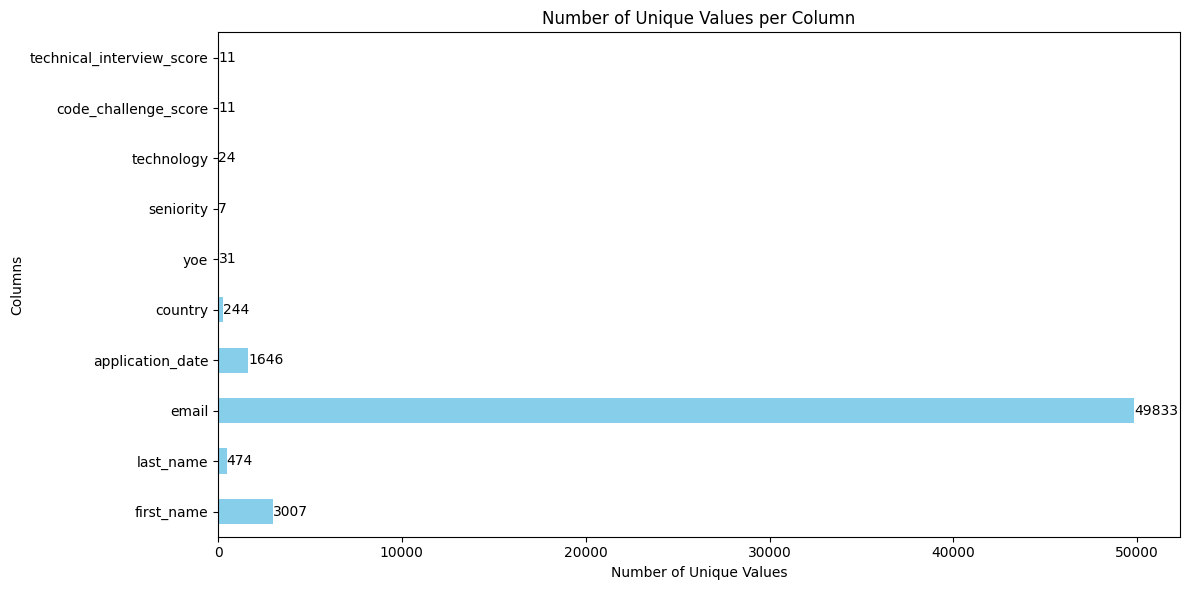

In [20]:
import matplotlib.pyplot as plt


unique_counts = data.nunique()


colors = ['skyblue']

plt.figure(figsize=(12, 6)) 
bar_plot = unique_counts.plot(kind='barh', color=colors)

plt.ylabel('Columns')
plt.xlabel('Number of Unique Values')
plt.title('Number of Unique Values per Column')


for i, value in enumerate(unique_counts):
    plt.text(value, i, str(value), ha='left', va='center')


plt.tight_layout()
plt.show()

In this scenario, we examined the count of distinct values and observed cases where both first and last names appeared repeatedly. As for the emails, while not all are distinct, most are. We found candidates from a total of 244 countries, covering 7 technologies; this is somewhat rare, as there are 195 countries in the world. Candidates' years of work experience ranged from 0 to 31, and the remaining aspect refers to the score, which is significant given that the scale ranges from 0 to 10.

Now, let's look at the date range of our csv:

In [14]:
min_date= data['application_date'].min()

max_date= data['application_date'].max()


print("The data goes from: "+ str(min_date)+ " to " + str(max_date))

The data goes from: 2018-01-01 to 2022-07-04


This data ranges from the beginning of 2018 to July 04, 2022.

Now, let's take an exploratory look at some key columns for our analysis.

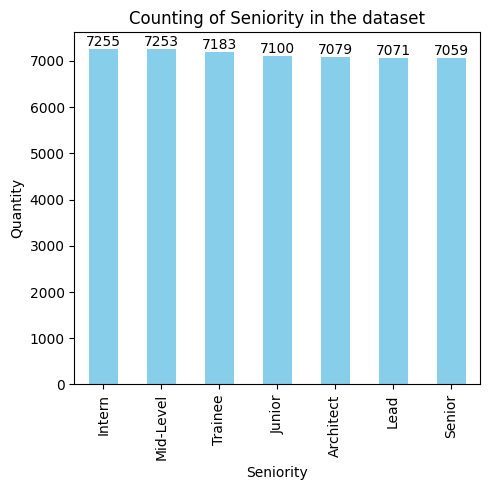

In [16]:
import matplotlib.pyplot as plt

data_types_counts = data.seniority.value_counts()


colors = ['skyblue']

plt.figure(figsize=(5, 5))
bar_plot = data_types_counts.plot(kind='bar', color=colors)

plt.xlabel('Seniority')
plt.ylabel('Quantity')
plt.title('Counting of Seniority in the dataset')


for i, value in enumerate(data_types_counts):
    plt.text(i, value + 0, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

As we can see, all values remain above 7000, showing a remarkably similar consistency among them. It is important to perform this analysis, as it will provide us with key data for our final evaluation.

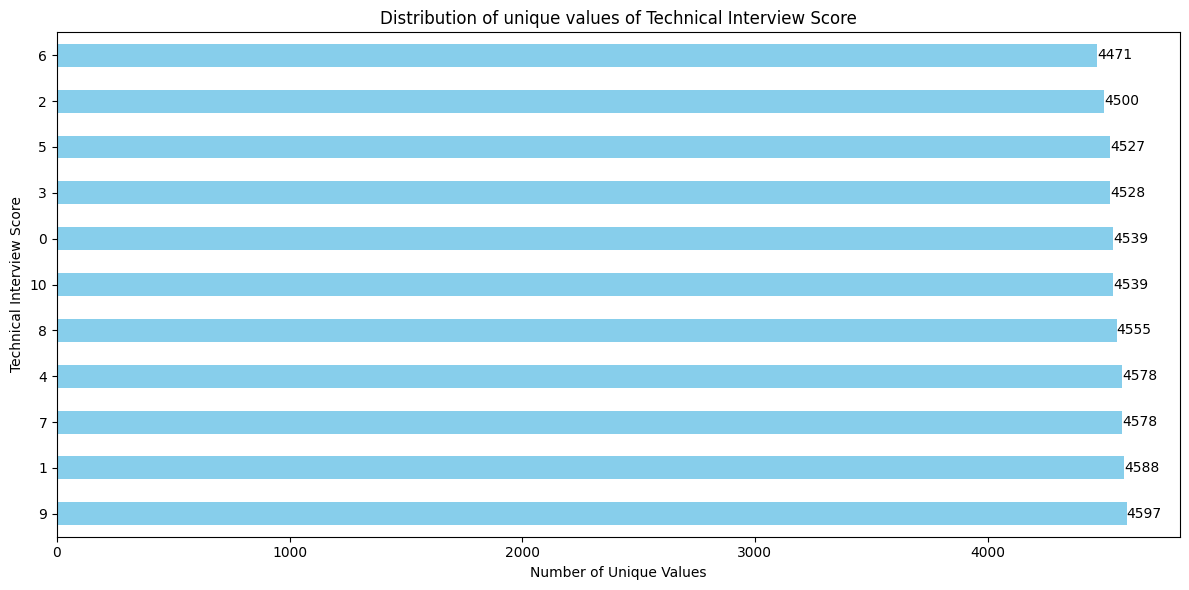

In [47]:
import matplotlib.pyplot as plt


technical_interview_score = data['technical_interview_score'].value_counts()


colors=['skyblue']

plt.figure(figsize=(12, 6)) 
bar_plot = technical_interview_score.plot(kind='barh', color=colors)

plt.ylabel('Technical Interview Score')
plt.xlabel('Number of Unique Values')
plt.title('Distribution of unique values of Technical Interview Score')


for i, value in enumerate(technical_interview_score):
    plt.text(value, i, str(value), ha='left', va='center')


plt.tight_layout()
plt.show()

As observed, values consistently remains above 4000, indicating a notable similarity among the values as they closely align with each other.

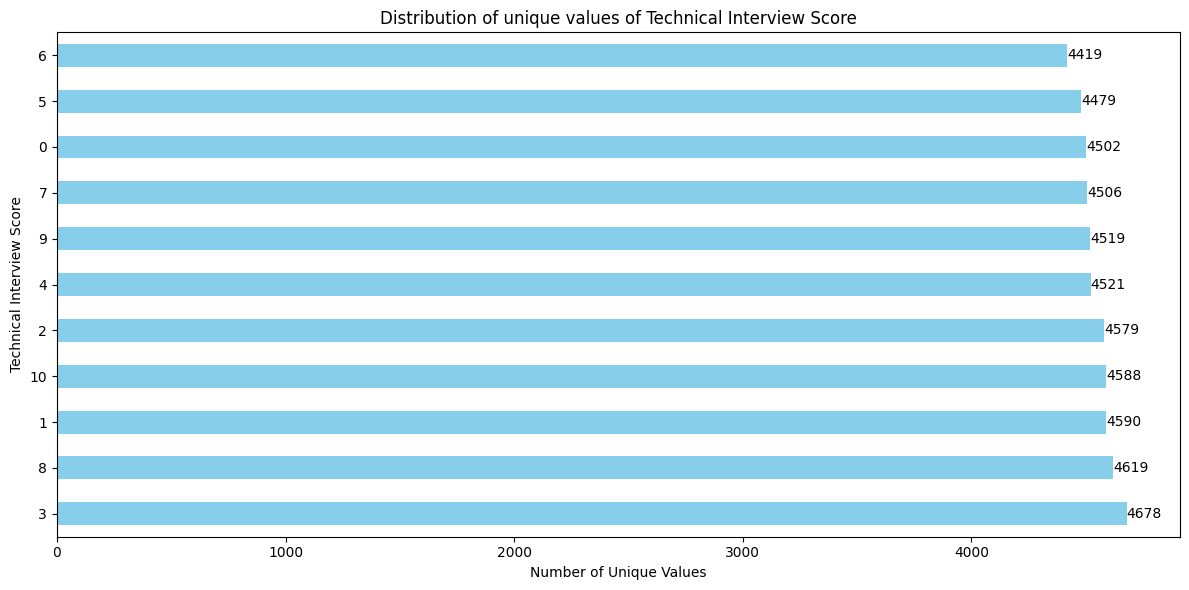

In [48]:
import matplotlib.pyplot as plt


code_challenge_score = data['code_challenge_score'].value_counts()


colors=['skyblue']

plt.figure(figsize=(12, 6)) 
bar_plot = code_challenge_score.plot(kind='barh', color=colors)

plt.ylabel('Technical Interview Score')
plt.xlabel('Number of Unique Values')
plt.title('Distribution of unique values of Technical Interview Score')


for i, value in enumerate(code_challenge_score):
    plt.text(value, i, str(value), ha='left', va='center')


plt.tight_layout()
plt.show()

As observed, values consistently remains above 4000, indicating a notable similarity among the values as they closely align with each other.

Here is an analysis of the dates that have the highest number of applications and the lowest number of applications:

In [46]:
import pandas as pd

data['application_date'] = pd.to_datetime(data['application_date'])

applications_by_date = data['application_date'].dt.date.value_counts().sort_index()

date_with_most_applications = applications_by_date.idxmax()
most_applications = applications_by_date.max()

date_with_least_applications = applications_by_date.idxmin()
least_applications = applications_by_date.min()

print("Date with most applications:", date_with_most_applications, "- Number of applications:", most_applications)
print("Date with least applications:", date_with_least_applications, "- Number of applications:", least_applications)


Date with most applications: 2020-07-07 - Number of applications: 50
Date with least applications: 2022-01-08 - Number of applications: 14


There is a significant difference in the number of applications between the two dates. The date with the most applications (2020-07-07) has 36 more applications than the date with the least applications (2022-01-08). This suggests that there may be seasonal trends or other factors that influence the number of applications received.

## The 4 Step: HIRED

Now that we have performed our EDA (Exploratory Data Analysis), we proceed to create the new table, but with the column "HIRED", which indicates whether a candidate was hired (1) or not (0).

In addition, we create a new column called "category_of_technology" to make the first chart.

In [49]:
Session = sessionmaker(bind=engine)
session = Session()

Base= declarative_base()

class candidates(Base):
    __tablename__ = 'hiredCandidates'
    id = Column(Integer, primary_key=True, autoincrement=True)
    first_name = Column(String(50))
    last_name = Column(String(50))
    email = Column(String(100))
    application_date = Column(Date)
    country = Column(String(200))
    yoe = Column(Integer)
    seniority = Column(String(200))
    technology = Column(String(200))
    code_challenge_score = Column(Integer)
    technical_interview_score = Column(Integer)
    hired = Column(Integer)
    category_of_technology = Column(String(200))
   

engine = create_engine(db_connection)
Base.metadata.create_all(engine)

Next, we can see the new table (hiredCandidates) created:

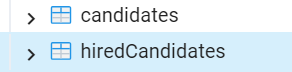

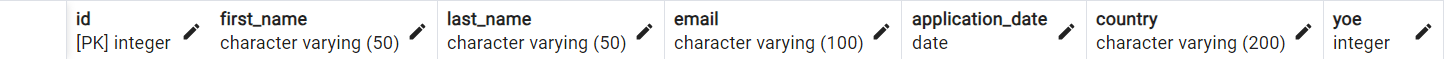
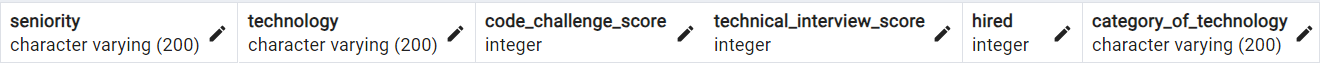


Here, we rename the column names and load the data into the table, which contain spaces, and take the opportunity to calculate the values of our new column called "hired".

In [50]:
class File:
    def __init__(self, file):
        self.df = pd.read_csv(file, sep=';', encoding='utf-8')
    
    def rename_columns(self):
        new_columns = {
            "First Name": "first_name",
            "Last Name": "last_name",
            "Email": "email",
            "Application Date": "application_date",
            "Country": "country",
            "YOE": "yoe",
            "Seniority": "seniority",
            "Technology": "technology",
            "Code Challenge Score": "code_challenge_score",
            "Technical Interview Score": "technical_interview_score",
        }
        self.df.rename(columns=new_columns, inplace=True)

data = File('candidates.csv')
data.rename_columns()

for index, row in data.df.iterrows():
    if row['code_challenge_score'] >= 7 and row['technical_interview_score'] >= 7:
        row['hired'] = 1
    else:
        row['hired'] = 0

    candidate = candidates(**row)
    session.add(candidate)

session.commit()
data.df.to_sql('candidates', engine, if_exists='replace', index=False)
print("Data uploaded")

Data uploaded


We call our table from the database.

In [51]:
import psycopg2

engine = create_engine(db_connection) #We create a SQLAlchemy engine to connect to the database

table_name = 'hiredCandidates'  
df = pd.read_sql_table(table_name, engine) #We read the table into a pandas dataframe
HiredTable=df

We can see "None" in our "category_of_technology" column since we have not yet done the procedure of categorizing the technologies.

In [52]:
HiredTable.head()

,id,first_name,last_name,email,application_date,country,yoe,seniority,technology,code_challenge_score,technical_interview_score,hired,category_of_technology
0,1,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3,0,None
1,2,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10,0,None
2,3,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9,1,None
3,4,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1,0,None
4,5,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7,1,None


## The Step #5: Analysis


Here, what was done was, was to extract only the values of the analysis required; to later make the graphs with POWERBI.

Now, let's proceed with our procedure of categories of technologies, to see the result in another correct way.

In [57]:
technology_to_category = {
    'Development - CMS Backend': 'Development',
    'Development - FullStack': 'Development',
    'Development - Frontend': 'Development',
    'Development - Backend': 'Development',
    'Game Development': 'Development',
    'Adobe Experience Manager': 'Development',
    'QA Automation': 'Quality Assurance',
    'QA Manual': 'Quality Assurance',
    'DevOps': 'Operations',
    'System Administration': 'Operations',
    'Database Administration': 'Operations',
    'Data Engineer': 'Data',
    'Business Intelligence': 'Data',
    'Salesforce': 'Sales and Business',
    'Sales': 'Sales and Business',
    'Client Success': 'Sales and Business',
    'Business Analytics / Project Management': 'Sales and Business',
    'Social Media Community Management': 'Marketing and Communication',
    'Mulesoft': 'Marketing and Communication',
    'Technical Writing': 'Marketing and Communication',
    'Security Compliance': 'Security',
    'Security': 'Security',
    'Design': 'Design',
}
df['category_of_technology'] = HiredTable['technology'].map(technology_to_category)

Here, we add the result to our table in PostgreSQL:

In [55]:
name_of_table = 'hiredCandidates'
df.to_sql(name_of_table, engine, if_exists='replace', index=False)
print("Data uploaded")

Data uploaded


In [58]:
HiredTable.head()

,id,first_name,last_name,email,application_date,country,yoe,seniority,technology,code_challenge_score,technical_interview_score,hired,category_of_technology
0,1,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3,0,Data
1,2,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10,0,Data
2,3,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9,1,Sales and Business
3,4,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1,0,Quality Assurance
4,5,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7,1,Marketing and Communication


Next, we start by pulling out the analysis of the graphs that have been created in PowerBi.

#### 1. Hires By Technology:

In [72]:
from sqlalchemy import func, extract

Session = sessionmaker(bind=engine)
session = Session()

query = session.query(candidates.technology, func.count(candidates.id)).\
        filter(candidates.hired == 1).\
        group_by(candidates.technology).\
        all()

session.close()

df = pd.DataFrame(query, columns=['Technology', 'Count'])

df = df.sort_values(by='Count', ascending=False)

print(df)


                                 Technology  Count
12                         Game Development    519
5                                    DevOps    495
7                     System Administration    293
0                 Development - CMS Backend    284
22                 Adobe Experience Manager    282
9                   Database Administration    282
14                           Client Success    271
17                                 Security    266
16                   Development - Frontend    266
19                                 Mulesoft    260
6                                 QA Manual    259
2                                Salesforce    256
15                    Development - Backend    255
23  Business Analytics / Project Management    255
1                             Data Engineer    255
10                    Business Intelligence    254
8                   Development - FullStack    254
11               Development - CMS Frontend    251
13                      Securit

Here we can see that the predominant technology among candidates hired was Game Development, accounting for 519 of total hires. Other popular technologies included DevOps, with 495, and System Administration, with 293. On the other hand, the least frequent technology was Technical Writing, with 223 of total hires.

#### 2. Hires By Year:

In [67]:
Session = sessionmaker(bind=engine)
session = Session()

query2 = session.query(extract('year', candidates.application_date).label('year'), func.count(candidates.id).label('hires')).\
        filter(candidates.hired == 1).\
        group_by('year').\
        order_by('year').\
        all()

session.close()

df = pd.DataFrame(query2)
df = df.sort_values(by='year')

print(df)


   year  hires
0  2018   1409
1  2019   1524
2  2020   1485
3  2021   1485
4  2022    795


Based on the findings, we can observe consistency in the hiring figures over the past few years, albeit with a slight dip noted in 2022. The peak hiring year was 2019, boasting a total of 1524 recruitments. Both 2020 and 2021 saw an equal number of hires, with 1485 each. Conversely, 2022 registered the fewest hires; however, it's essential to highlight that data for this year only extends through July. Hence, officially, 2018 stands out as the year with the lowest number of hires.

#### 3. Hires By Seniority:

In [68]:
Session = sessionmaker(bind=engine)
session = Session()


query3 = session.query(candidates.seniority, func.count(candidates.id).label('hires')).\
        filter(candidates.hired == 1).\
        group_by(candidates.seniority).\
        all()


session.close()

df = pd.DataFrame(query3)
df = df.sort_values(by='hires', ascending=False)

print(df)


   seniority  hires
1     Intern    985
6     Junior    977
2    Trainee    973
0  Architect    971
3     Senior    939
4       Lead    929
5  Mid-Level    924


In these findings, it's evident that the most prevalent seniority level was "Intern", with a total of 985 recruitments. We also noted a significant preference for the "Junior" and "Trainee" categories. Conversely, the least sought-after seniority level was "Mid-Level", with just 924 candidates hired. This trend could indicate a random data generation process, given that in reality, it's more common for seasoned professionals, like seniors, to be recruited rather than interns or those with less experience.

Nevertheless, in an actual scenario, there might be an alternative rationale. For instance, the company could be prioritizing internal talent development, investing in training and educational initiatives for interns and less experienced staff, thereby resulting in a higher number of hires within these categories.

#### 4. Hires By Country Over Years (USA, Brazil, Colombia, and Ecuador only):

In [70]:
Session = sessionmaker(bind=engine)
session = Session()


countries = ['United States of America', 'Brazil', 'Colombia', 'Ecuador'] # Here, we define the list of countries

# Here execute the query using SQLAlchemy
query4 = session.query(extract('year', candidates.application_date).label('year'), 
        candidates.country,
        func.count(candidates.id).label('hires')).\
        filter(candidates.hired == 1).\
        filter(candidates.country.in_(countries)).\
        group_by('year', 'country').\
        order_by('year').\
        all()

session.close()

df = pd.DataFrame(query4)

print(df)

    year                   country  hires
0   2018                    Brazil      9
1   2018                  Colombia      7
2   2018                   Ecuador      1
3   2018  United States of America      5
4   2019                    Brazil      7
5   2019                  Colombia      8
6   2019                   Ecuador      3
7   2019  United States of America      3
8   2020                    Brazil      6
9   2020                  Colombia      8
10  2020                   Ecuador      8
11  2020  United States of America      4
12  2021                    Brazil      7
13  2021                  Colombia      1
14  2021                   Ecuador      5
15  2021  United States of America      8
16  2022                    Brazil      4
17  2022                  Colombia      1
18  2022                   Ecuador      3
19  2022  United States of America      5


Based on these findings, Brazil took the lead in 2018 with 9 recruits, while Ecuador rounded off the bottom with 7 candidates brought on board. In 2019, Colombia emerged as the frontrunner in hiring, while the United States and Ecuador shared the bottom spot with an equal number of recruits. Moving to 2020, Ecuador and Colombia took the lead with 8 recruits each, while the United States saw 4 new hires. The trend continued in 2021, with the United States leading the pack with 8 new hires, while Colombia lagged behind with only 1 candidate recruited. Finally, in 2022, the United States once again led the hiring spree with 5 new recruits, while Colombia maintained its position with one new addition.

Now, in order to see all our graphics, we will go to the PDF called "Visualizations - Workshop_1"; which is located in the repository files.